In [20]:
%load_ext autoreload
%autoreload 2

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
import sys
import os
import numpy as np
import deepdish as dd
import matplotlib.pyplot as plt
import cv2
import glob
import pickle
import smplx
import trimesh
import torch
from tqdm import tqdm

sys.path.append('.')
from eval.egobody import EgoBodyDataset
from eval.ehf import EHFDataset
from eval.ssp3d import SSP3DDataset
from eval.ubody import UBodyDataset

In [3]:
def plot_points_on_image(image, points, color=(0, 0, 255), radius=3, thickness=-1):
    """
    Plots a batch of 2D points on an image using OpenCV.

    Args:
        image (numpy.ndarray): The image to plot the points on.
        points (numpy.ndarray): A 2D array of shape (batch_size, 2) containing 
                                the (x, y) coordinates of the points.
        color (tuple, optional): The color of the points in BGR format. 
                                 Defaults to (0, 0, 255) (blue).
        radius (int, optional): The radius of the points. Defaults to 3.
        thickness (int, optional): The thickness of the point's circle. A value
                                   of -1 will fill the circle. Defaults to -1.
    """

    # Make a copy of the image so we don't modify the original
    image_copy = image.copy() 

    # Iterate through each point in the batch
    for x, y in points:
        center_coordinates = (int(x), int(y))  # Convert to integer coordinates
        cv2.circle(image_copy, center_coordinates, radius, color, thickness)

    return image_copy 

### EgoBody

In [4]:
ds = EgoBodyDataset(
    data_path='/mnt/vol_f/datasets/EgoBody',
    smpl_model_path='/mnt/vol_d/projects/SMPLer-X/common/utils/human_model_files/smpl/', 
    return_vertices=True,
    return_projection=True
)
print(len(ds))
img,  _, v3, v2 = ds[500]

num_betas=10, shapedirs.shape=(6890, 3, 10), self.SHAPE_SPACE_DIM=300
num_betas=10, shapedirs.shape=(6890, 3, 10), self.SHAPE_SPACE_DIM=300
num_betas=10, shapedirs.shape=(6890, 3, 10), self.SHAPE_SPACE_DIM=300
622


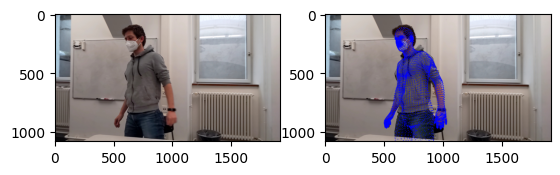

In [5]:
fig, axes = plt.subplots(ncols=2)
axes[0].imshow(img)
axes[1].imshow(plot_points_on_image(img, v2))

### EHF

In [6]:
ds = EHFDataset(
    data_path='/mnt/vol_f/smplify_cse/ehf',
    smplx_model_path='/mnt/vol_d/projects/SMPLer-X/common/utils/human_model_files/smplx/',
    return_vertices=True,
    return_projection=True
)
len(ds)
img, _, v3, v2 = ds[99]
v3.shape, v2.shape

((10475, 3), (10475, 2))

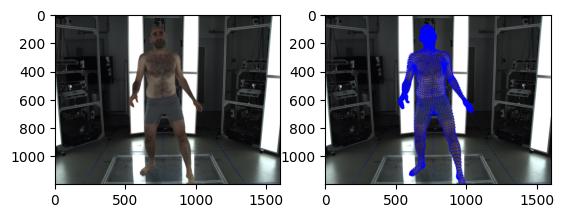

In [7]:
fig, axes = plt.subplots(ncols=2)
axes[0].imshow(img)
axes[1].imshow(plot_points_on_image(img, v2))

### SSP3d

In [8]:
ds = SSP3DDataset(
    data_path='/mnt/vol_f/smplify_cse/ssp3d/',
    smpl_model_path='/mnt/vol_d/projects/SMPLer-X/common/utils/human_model_files/smpl/', 
    return_vertices=True,
    return_projection=True
)
print(len(ds))
img, bbox, v3, v2 = ds[76]
v3.shape, v2.shape

num_betas=10, shapedirs.shape=(6890, 3, 10), self.SHAPE_SPACE_DIM=300
num_betas=10, shapedirs.shape=(6890, 3, 10), self.SHAPE_SPACE_DIM=300
num_betas=10, shapedirs.shape=(6890, 3, 10), self.SHAPE_SPACE_DIM=300
311


((6890, 3), (6890, 2))

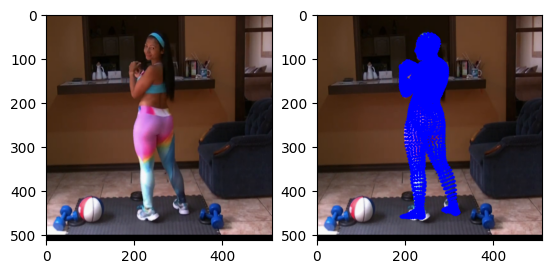

In [9]:
fig, axes = plt.subplots(ncols=2)
axes[0].imshow(img)
axes[1].imshow(plot_points_on_image(img, v2))

### UBody

In [16]:
ds = UBodyDataset(
    data_path="/mnt/vol_f/datasets",
    smplx_model_path="/mnt/vol_c/projects/smplx-estimation-bh/weights/smplx",
    return_vertices=True,
    return_projection=True,
)
print(len(ds))

947


In [11]:
ds.dbs[0].TEST_SAMPLE_INTERVAL

1000

In [19]:
img, bbox, v3, v2 = ds[76]
print(v3.shape, v2.shape)
bbox

(10475, 3) (10475, 2)


array([428.33679199, 146.28340149, 484.87133789, 564.11399841])

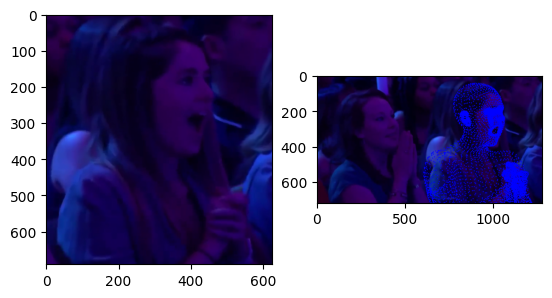

In [13]:
fig, axes = plt.subplots(ncols=2)
axes[0].imshow(img[19:19+691, 604:604+624])
axes[1].imshow(plot_points_on_image(img, v2))

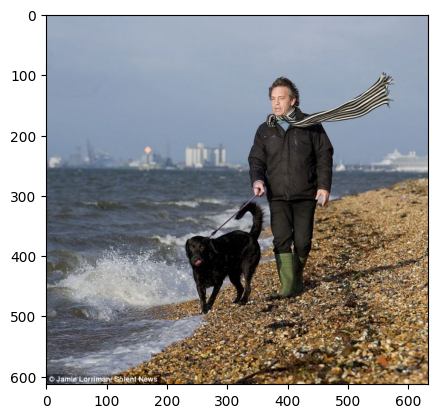

In [66]:
image = cv2.imread('/mnt/vol_h/sydor/control_net_training/dataset/data/human_dataset/t2023120116/laion_face/p00011/id1014551.jpg')[..., ::-1]
plt.imshow(image)

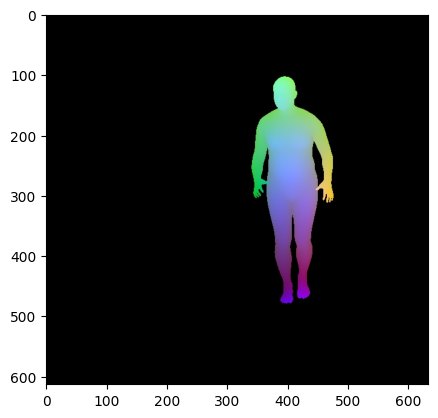

In [68]:
avatar = cv2.imread('/mnt/vol_f/control-human-gen-v2/laion-faces/smplerx-pred-pncc/t2023120116/laion_face/p00011/id1014551.jpg')[..., ::-1]
mask = (avatar.sum(-1) > 30)
plt.imshow(avatar)

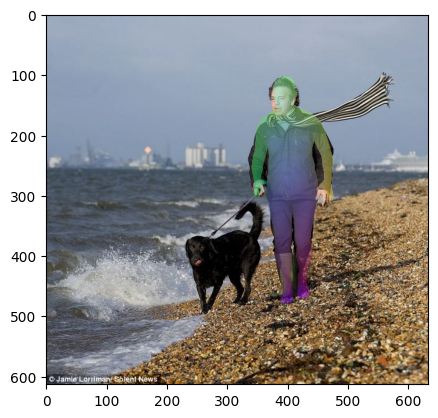

In [69]:
overlay = image.copy()
overlay[mask] = cv2.addWeighted(overlay[mask], 0.5, avatar[mask], 0.5, 0)
plt.imshow(overlay)

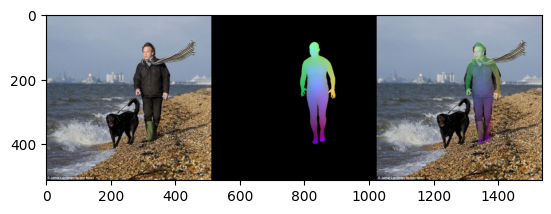

In [70]:
ymin, ymax, xmin, xmax = 0, 712, 0, 712
full = np.concatenate([
    cv2.resize(image[ymin:ymax, xmin:xmax], (512, 512)), 
     cv2.resize(avatar[ymin:ymax, xmin:xmax], (512, 512)), 
     cv2.resize(overlay[ymin:ymax, xmin:xmax], (512, 512))
], axis=1)
plt.imshow(full)

In [71]:
# fulls = []
fulls.append(full)

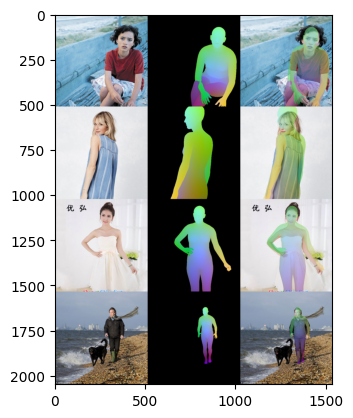

In [72]:
plt.imshow(np.concatenate(fulls, axis=0))

In [73]:
cv2.imwrite('results.jpg', np.concatenate(fulls, axis=0)[..., ::-1])

True